# Identify the Largest Recoverable Angular Scale of SCUBA2

Import packages

In [1]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy
import AG_fft_tools as fft_tools
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel 
from astropy.modeling.models import Gaussian2D
%matplotlib inline

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Use Oph L1688 Herschel 250 um map as model image.
L1688 is located at ∼135 pc. Herschel 250 um map's resolution is 18" and pixel size is 6".

Plot model image, the source is about 3 deg * 3 deg

INFO: Auto-setting vmin to -9.325e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.035e+03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.325e+02 [aplpy.core]


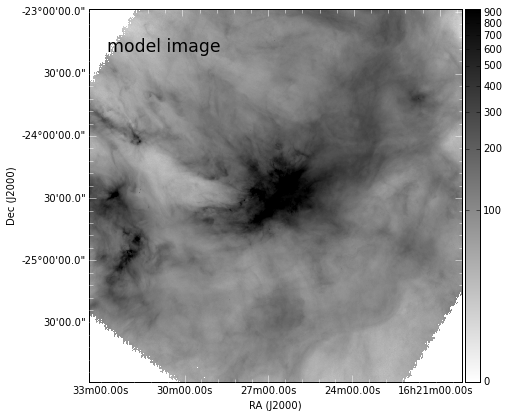

In [32]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/spire250.fits'
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/spire250.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_model.add_label(0.2,0.9, 'model image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(246.6879631142824,-24.48757996761378,width=3.,height=3.)

Scale the model map to a further distance, to mimic the observations at lower angular resolution.
I scale the model map to 1350 pc and have a resolution of 1.8" and pixel size of 0.6".
And also for using as the fakemap, I scale the flux of model image and move it to the same place of the blank image.

Plot scaled image, the source is about 0.3 deg * 0.3 deg

INFO: Auto-setting vmin to -2.238e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.484e-03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.238e-03 [aplpy.core]


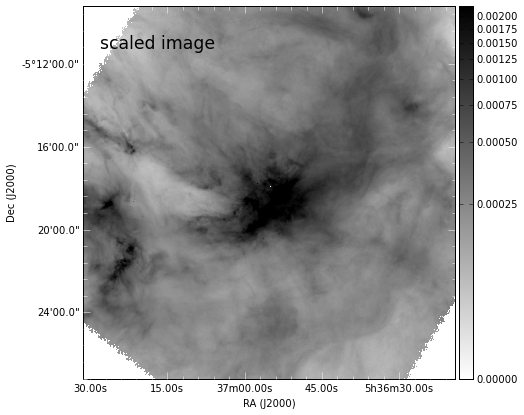

In [60]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/spire250.scale.conv.fits'
f_scaled = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/spire250.scale.conv.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_scaled.add_label(0.2,0.9, 'scaled image', color='black', relative=True, size='xx-large',layer='source')
f_scaled.show_grayscale()
f_scaled.add_colorbar()
f_scaled.colorbar.show()
f_scaled.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_scaled.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Plot the simulated SCUBA2 observation

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.606e-03 [aplpy.core]
INFO: Auto-setting vmax to  8.585e-03 [aplpy.core]
INFO: Auto-setting vmin to -7.642e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.658e-03 [aplpy.core]


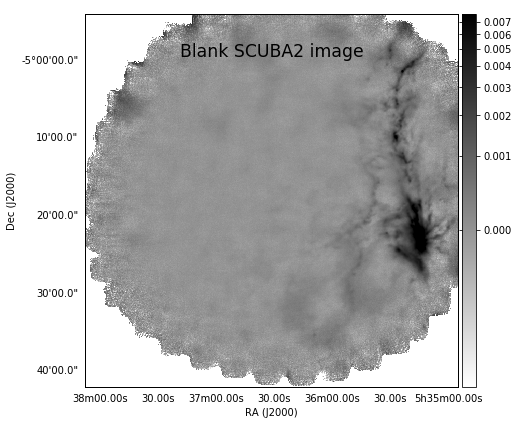

In [13]:
f_blank = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/blank850.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_blank.add_label(0.5,0.9, 'Blank SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_blank.show_grayscale()
f_blank.add_colorbar()
f_blank.colorbar.show()
f_blank.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_blank.recenter(84.1304166666667,-5.3035555555555,width=0.8,height=0.8)

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.612e-03 [aplpy.core]
INFO: Auto-setting vmax to  8.663e-03 [aplpy.core]
INFO: Auto-setting vmin to -7.631e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.728e-03 [aplpy.core]


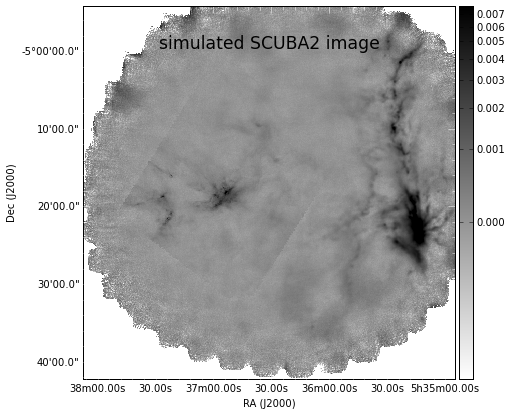

In [61]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.fits'
f_sim = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_sim.add_label(0.5,0.9, 'simulated SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_sim.show_grayscale()
f_sim.add_colorbar()
f_sim.colorbar.show()
f_sim.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_sim.recenter(84.1304166666667,-5.3035555555555,width=0.8,height=0.8)

Regrid the simulated SCUBA2 image to have the same pixel size of the scaled map for comparing it with our scaled model map.

Plot the re-grided simulated SCUBA2 observation

INFO: Auto-setting vmin to -4.484e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.188e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.304e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.949e-03 [aplpy.core]


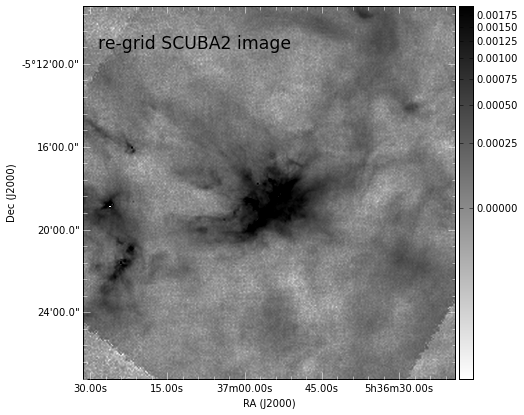

In [62]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.regrid.fits'
f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.regrid.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_reg.add_label(0.3,0.9, 're-grid SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_reg.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Compare the power spectrum of the scaled model and simulated SCUBA2 images to identify the largest recoverable angular scales of SCUBA2

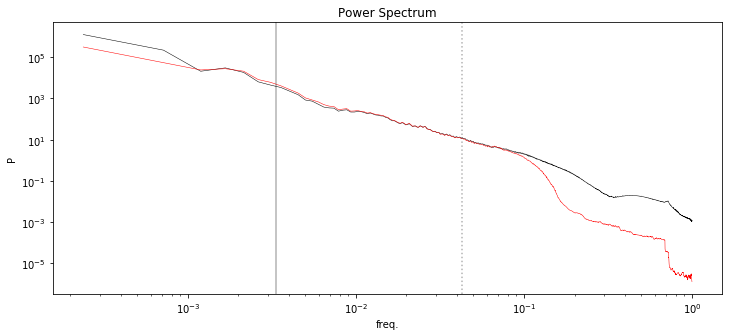

0.600000012


In [27]:
import FITS_tools
#import model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/spire250.scale.conv.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

SCUBA2_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.regrid.fits'
hdu_sc2=fits.open(SCUBA2_file)
data_sc2 = hdu_sc2[0].data

mod_header = hdu_mod[0].header
pixscale = FITS_tools.header_tools.header_to_platescale(mod_header)
pixscale = ((pixscale*u.deg).to(u.arcsec)).value

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_sc2,zz2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=0.5,color='black',label='Model image')
ax.plot((frequency_sc2),(zz2),linewidth=0.5,color='red',label='Simulated SCUBA2 image')

#add beam/filtering info
beam_sc2_freq = 1/(14.0/.6)
ax.axvline(x=beam_sc2_freq,linestyle=':',color='k',alpha=0.3,label='SCUBA2 beam')
filter_scale = 1/(3*60.0/.6)
ax.axvline(filter_scale,linestyle='-',color='k',alpha=0.3,label='Filtering scale (3 acrmin)')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
#legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()
print pixscale

In [39]:
(1/(2.38663484e-04/9.99761337e-01))*0.6/3600.

0.69816666842926

In [13]:
print frequency_mod

[  2.38663484e-04   7.15990453e-04   1.19331742e-03 ...,   9.98806683e-01
   9.99284010e-01   9.99761337e-01]


The simulated map even covers angular scale lower than 14", and a proper way of simulating the right angular resolution is to first smooth the image to the corresponding angular resolution before scaling the pixel size and intensity.

# Smooth the model image to the corresponding angular resolution, before scaling the pixel size and intensity.

The physical scale resolved by the scuba2-850 micron resolution (14" angular resolution) at d～1350 pc will correspond to that resolved by a 135" angular resolution observation for a d～140 pc source.
We need to smooth Herschel 250 um image from 18" resolution to 135" resolution. 

In [31]:
#import model map
Model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.fits'
hdu_mod=fits.open(Model_file)
data_mod = hdu_mod[0].data
data_mod = np.nan_to_num(data_mod)
header = hdu_mod[0].header


target_resolution = 135.
native_beamsize = 18.
pixel_size = 6.0

FWHM_TO_SIGMA = 1./np.sqrt(8*np.log(2))

kernel_size=((target_resolution*FWHM_TO_SIGMA)**2-(native_beamsize*FWHM_TO_SIGMA)**2)**0.5
pixel_n = kernel_size/pixel_size
gauss_kernel =Gaussian2DKernel(pixel_n)
smoothed_data_gauss = convolve(data_mod, gauss_kernel,normalize_kernel=True)

#save fits file
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.fits'

fits.writeto(outpath,smoothed_data_gauss,header=header) 
fits.setval(outpath,'BMAJ',value=target_resolution/3600.)  
fits.setval(outpath,'BMIN',value=target_resolution/3600.) 

Plot the smoothed image

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to -9.429e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.047e+03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.429e+02 [aplpy.core]


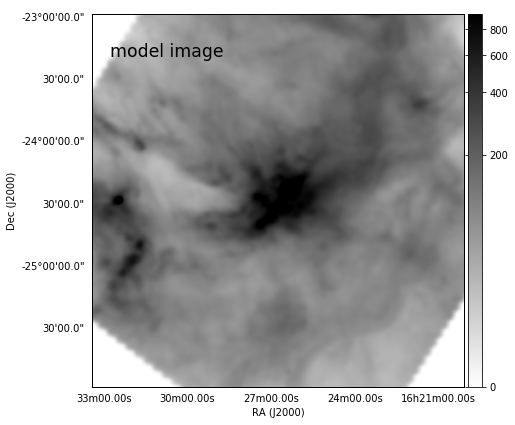

In [33]:
#import smoothed model map
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.fits', figsize=(7,7))
f_model.add_label(0.2,0.9, 'model image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(246.6879631142824,-24.48757996761378,width=3.,height=3.)

Check the power spectrum

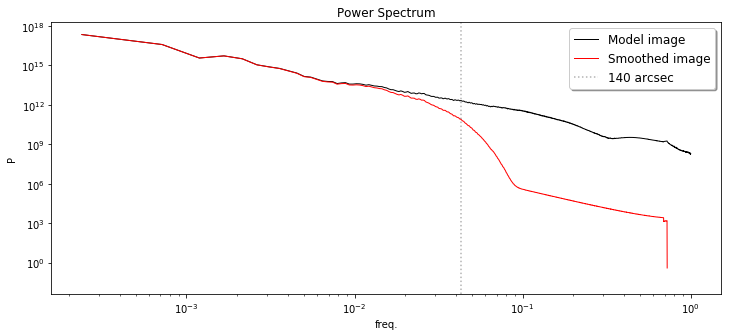

In [38]:
#import model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

smooth_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.fits'
hdu_smo=fits.open(smooth_file)
data_smo = hdu_smo[0].data

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_smo,zz2 = fft_tools.PSD2(data_smo,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=1.,color='black',label='Model image')
ax.plot((frequency_smo),(zz2),linewidth=1.,color='red',label='Smoothed image')


#add beam/filtering info
beam_smo_freq = 1./(140./6.)
ax.axvline(x=beam_smo_freq,linestyle=':',color='k',alpha=0.3,label='140 arcsec')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.show()

In [35]:
print frequency_mod,frequency_smo

[  2.38663484e-04   7.15990453e-04   1.19331742e-03 ...,   9.98806683e-01
   9.99284010e-01   9.99761337e-01] [  2.38663484e-04   7.15990453e-04   1.19331742e-03 ...,   9.98806683e-01
   9.99284010e-01   9.99761337e-01]


In [44]:
1./(6.982300042886218*60.*60./6.)

0.00023869880360766197

Scale the pixel size and intensity.
Scale the model map to a further distance, to mimic the observations at lower angular resolution. 

In [45]:
#import smoothed map
sm_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.fits'
hdu_sm=fits.open(sm_file)


data_scale = hdu_sm[0].data
#Scale the intensity
data_scale = data_scale/(83333.*5)

nheader = hdu_sm[0].header

#Scale the pixel size and position
nheader['CDELT1'] = -0.00016666667
nheader['CDELT2'] = 0.0001666666666667
nheader['CRVAL1'] = 84.2304166666667
nheader['CRVAL2'] = -5.2835555555555

outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits'

fits.writeto(outpath,data_scale,header=nheader) 

In [49]:
#import smoothed map
mod_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.fits'
hdu_mod=fits.open(mod_file)


data_scale = hdu_mod[0].data
#Scale the intensity
data_scale = data_scale/(83333.*5)

nheader = hdu_sm[0].header

#Scale the pixel size and position
nheader['CDELT1'] = -0.00016666667
nheader['CDELT2'] = 0.0001666666666667
nheader['CRVAL1'] = 84.2304166666667
nheader['CRVAL2'] = -5.2835555555555

outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.scale.fits'

fits.writeto(outpath,data_scale,header=nheader)

Check the power spectrum

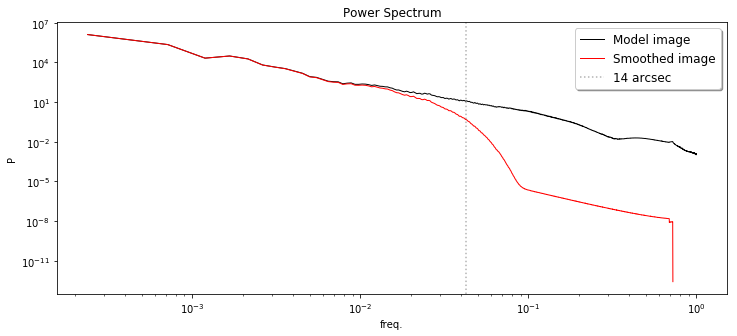

In [50]:
#import scaled model map and smoothed SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.scale.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

smooth_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits'
hdu_smo=fits.open(smooth_file)
data_smo = hdu_smo[0].data

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_smo,zz2 = fft_tools.PSD2(data_smo,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=1.,color='black',label='Model image')
ax.plot((frequency_smo),(zz2),linewidth=1.,color='red',label='Smoothed image')


#add beam/filtering info
beam_smo_freq = 1./(14./0.6)
ax.axvline(x=beam_smo_freq,linestyle=':',color='k',alpha=0.3,label='14 arcsec')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.show()

Plot fake map.

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.614e-03 [aplpy.core]
INFO: Auto-setting vmax to  8.663e-03 [aplpy.core]


/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to -7.648e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.729e-03 [aplpy.core]


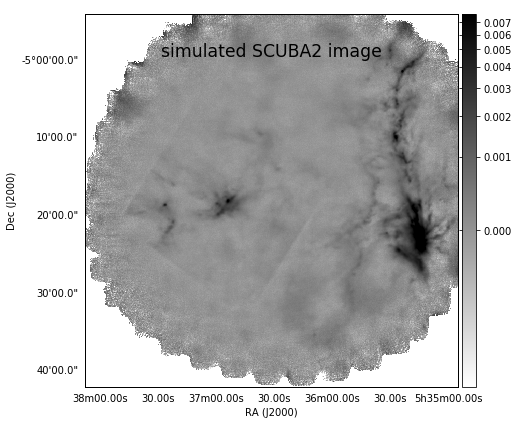

In [51]:
#define input and output file name, and import model map
f_sim = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/blank850_fake.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_sim.add_label(0.5,0.9, 'simulated SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_sim.show_grayscale()
f_sim.add_colorbar()
f_sim.colorbar.show()
f_sim.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_sim.recenter(84.1304166666667,-5.3035555555555,width=0.8,height=0.8)

Regrid the simulated SCUBA2 image to have the same pixel size of the scaled map for comparing it with our scaled model map.
Plot the re-grided simulated SCUBA2 observation and model image.

INFO: Auto-setting vmin to -4.488e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.192e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.306e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.952e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.263e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.512e-03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.263e-03 [aplpy.core]


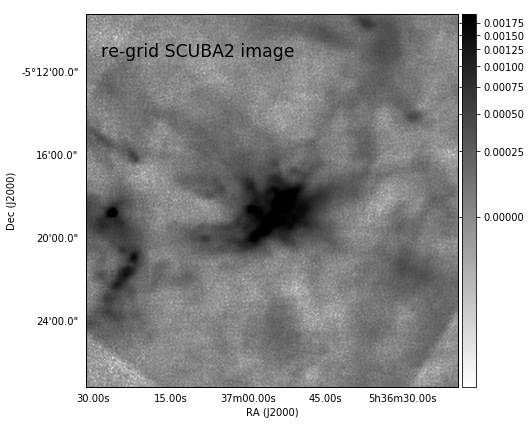

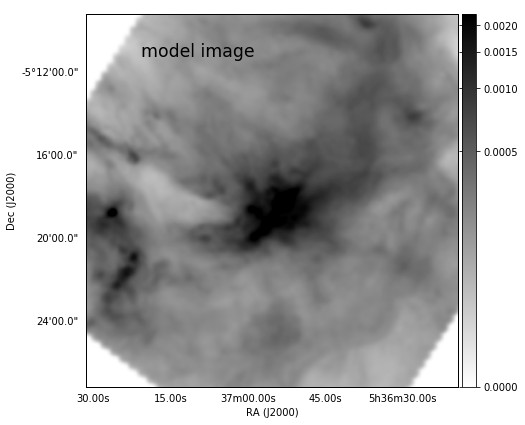

In [68]:
f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/blank850_fake.regrid.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_reg.add_label(0.3,0.9, 're-grid SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_reg.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'model image', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Check the power spectrum.

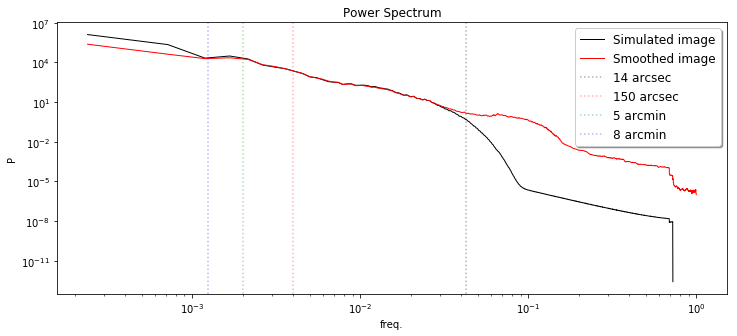

In [64]:
#import scaled model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

sc2_file='/Users/shjiao/desktop/Ophiuchus/nov_try/blank850_fake.regrid.fits'
hdu_sc2=fits.open(sc2_file)
data_sc2 = 0.9*hdu_sc2[0].data

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_sc2,zz2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=1.,color='black',label='Simulated image')
ax.plot((frequency_sc2),(zz2),linewidth=1.,color='red',label='Smoothed image')


#add beam/filtering info
beam_sc2_freq = 1./(14./0.6)
ax.axvline(x=beam_smo_freq,linestyle=':',color='k',alpha=0.3,label='14 arcsec')
beam_3min_freq = 1./(150./0.6)
ax.axvline(x=beam_3min_freq,linestyle=':',color='red',alpha=0.3,label='150 arcsec')
beam_5min_freq = 1./(5*60./0.6)
ax.axvline(x=beam_5min_freq,linestyle=':',color='green',alpha=0.3,label='5 arcmin')
beam_5min_freq = 1./(8*60./0.6)
ax.axvline(x=beam_5min_freq,linestyle=':',color='blue',alpha=0.3,label='8 arcmin')

#axis.set_xlim((3*10**-3))
#ax.set_ylim((10**-1))


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.show()

See the detail at large spatial angular.

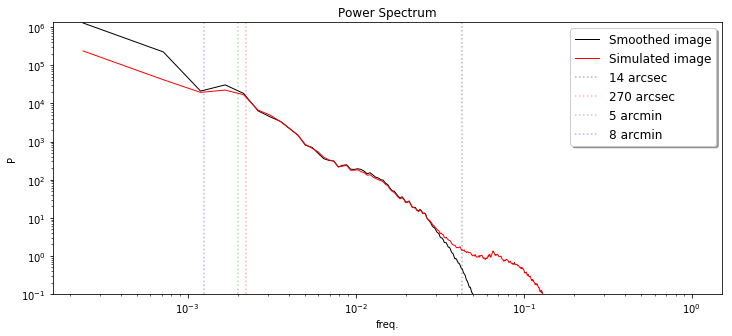

In [15]:
#import scaled model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

sc2_file='/Users/shjiao/desktop/Ophiuchus/nov_try/blank850_fake.regrid.fits'
hdu_sc2=fits.open(sc2_file)
data_sc2 = 0.9*hdu_sc2[0].data

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_sc2,zz2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=1.,color='black',label='Smoothed image')
ax.plot((frequency_sc2),(zz2),linewidth=1.,color='red',label='Simulated image')


#add beam/filtering info
beam_sc2_freq = 1./(14./0.6)
ax.axvline(x=beam_sc2_freq,linestyle=':',color='k',alpha=0.3,label='14 arcsec')
beam_3min_freq = 1./(270./0.6)
ax.axvline(x=beam_3min_freq,linestyle=':',color='red',alpha=0.3,label='270 arcsec')
beam_5min_freq = 1./(5*60./0.6)
ax.axvline(x=beam_5min_freq,linestyle=':',color='green',alpha=0.3,label='5 arcmin')
beam_8min_freq = 1./(8*60./0.6)
ax.axvline(x=beam_8min_freq,linestyle=':',color='blue',alpha=0.3,label='8 arcmin')

#axis.set_xlim((3*10**-3))
ax.set_ylim((10**-1))


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.show()

It seems the largest recoverable angular ccale of SCUBA2 at 850 um band is 270 arcsec (4.5 arcmin).

Subtract the simulated image from the model image.

In [2]:
from astropy import convolution

#import model map
Model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits'
hdu_mod=fits.open(Model_file)
data_mod = hdu_mod[0].data
data_mod = np.nan_to_num(data_mod)
header = hdu_mod[0].header


target_resolution_low = 300.
native_beamsize = 14.
pixel_size = 0.6

FWHM_TO_SIGMA = 1./np.sqrt(8*np.log(2))

kernel_size_low=((target_resolution_low*FWHM_TO_SIGMA)**2-(native_beamsize*FWHM_TO_SIGMA)**2)**0.5
pixel_n_low = kernel_size_low/pixel_size
gauss_kernel_low =Gaussian2DKernel(pixel_n_low)
#smoothed_data_gauss_low = convolve(data_mod, gauss_kernel_low,normalize_kernel=True)
smoothed_data_gauss_low = convolution.convolve_fft(data_mod, gauss_kernel_low, boundary='fill', allow_huge=True ,fill_value=data_mod.mean())


/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to -8.813e-05 [aplpy.core]
INFO: Auto-setting vmax to  9.782e-04 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.813e-04 [aplpy.core]


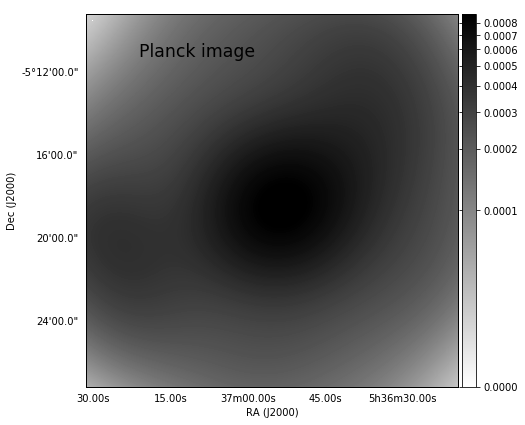

In [60]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/planck.fits'

fits.writeto(outpath,smoothed_data_gauss_low,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/planck.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'Planck image', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

In [4]:
target_resolution_mid = 37.
native_beamsize = 14.
pixel_size = 0.6

FWHM_TO_SIGMA = 1./np.sqrt(8*np.log(2))

kernel_size_mid=((target_resolution_mid*FWHM_TO_SIGMA)**2-(native_beamsize*FWHM_TO_SIGMA)**2)**0.5
pixel_n_mid = kernel_size_mid/pixel_size
gauss_kernel_mid =Gaussian2DKernel(pixel_n_mid)
#smoothed_data_gauss_mid = convolve(data_mod, gauss_kernel_mid,normalize_kernel=True)
smoothed_data_gauss_mid = convolution.convolve_fft(data_mod, gauss_kernel_mid, boundary='fill', allow_huge=True ,fill_value=data_mod.mean())

INFO: Auto-setting vmin to -2.210e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.453e-03 [aplpy.core]
INFO: Auto-setting vmin to -3.490e-19 [aplpy.core]
INFO: Auto-setting vmax to  2.210e-03 [aplpy.core]


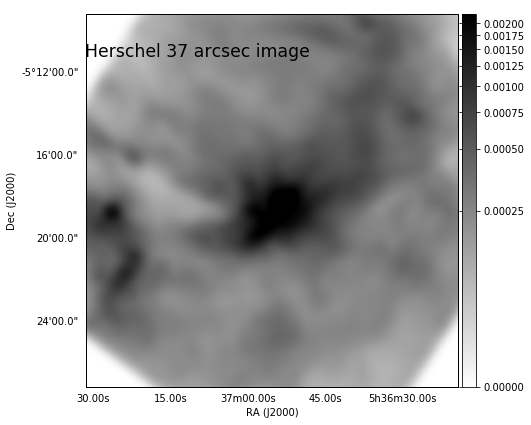

In [61]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/herschel_37.fits'

fits.writeto(outpath,smoothed_data_gauss_mid,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/herschel_37.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'Herschel 37 arcsec image', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

direct deconvolution in fourier domain

In [9]:
singledish_kernel = convolution.Gaussian2DKernel(289.2/pixel_size/2.35, x_size=2891, y_size=3032)
singledish_kernel_fft = np.fft.fft2(singledish_kernel)

In [10]:
deconv_kernel = singledish_kernel_fft.copy()
badpix = np.abs(deconv_kernel) < 0.1
im_low_fft = np.fft.fft2(smoothed_data_gauss_low)

naive_deconvolution_fft = (im_low_fft/(deconv_kernel+0.05))

naive_deconvolution_fft[badpix] = im_low_fft[badpix]
naive_deconvolution = np.fft.ifft2(naive_deconvolution_fft)                        
naive_deconv=np.fft.fftshift(naive_deconvolution.real)

INFO: Auto-setting vmin to -3.384e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.673e-03 [aplpy.core]
INFO: Auto-setting vmin to -1.721e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.491e-03 [aplpy.core]


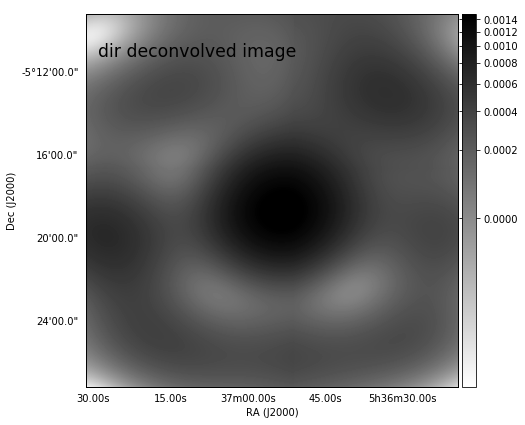

In [62]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/dir_deconv.fits'

fits.writeto(outpath,naive_deconv,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/dir_deconv.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'dir deconvolved image', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

L-R deconvolution

In [19]:
def rl_standard2(raw_image, psf, model,niter):

    """ Standard lucy-richardson convolution with intermediate resolution model image
    
    """
    psf /= psf.sum()
    psf_inverse = psf[::-1]

    lucy = model.copy()#np.ones( raw_image.shape ) * raw_image.mean()
    for i in xrange( niter ):
            estimate = fftconvolve(lucy, psf, mode='same')
            estimate[ np.isnan(estimate) ] = 0
            ff = raw_image/estimate
            ff[np.isnan(ff)] = 0.
            correction = fftconvolve(ff, psf_inverse, mode='same')
            correction[ np.isnan(correction) ] = 0
            print 'Correction0:',correction.mean()

            lucy *= correction
            print 'Means:', raw_image.mean(), lucy.mean()
            chisq = scipy.nansum((lucy - raw_image)**2 / (lucy)) / (raw_image.size-1)
            #print chisq
       
    return ff, estimate, lucy

In [20]:
import scipy
from scipy.signal import fftconvolve
#make kernel
psf = singledish_kernel.array

#input data files
raw_image= smoothed_data_gauss_low
model_image= smoothed_data_gauss_mid
#make sure model image and raw planck image have same area of valid field
raw_image[np.where(model_image==0)] = 0.
#make sure the total flux is the same
model_image = np.sum(raw_image)/np.sum(model_image)*model_image

#can change iteration times here
#ff,estimate,lucy = rl_standard2(raw_image,psf,model_image,1) 
#ff2,estimage_orig2,lucy2 = rl_standard2(raw_image,psf,model_image,2)
ff5,estimage_orig5,lucy5 = rl_standard2(raw_image,psf,model_image,5)

Correction0: 2.27992211895
Means: 0.000175226175586 0.000175227950095


/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide


Correction0: 1.15546161304
Means: 0.000175226175586 0.000175228291868
Correction0: 1.08211239231
Means: 0.000175226175586 0.000175227717949
Correction0: 1.06602336796
Means: 0.000175226175586 0.000175227714649
Correction0: 1.05910905659
Means: 0.000175226175586 0.000175227735634


INFO: Auto-setting vmin to -2.179e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.418e-03 [aplpy.core]
INFO: Auto-setting vmin to -1.110e-17 [aplpy.core]
INFO: Auto-setting vmax to  2.179e-03 [aplpy.core]


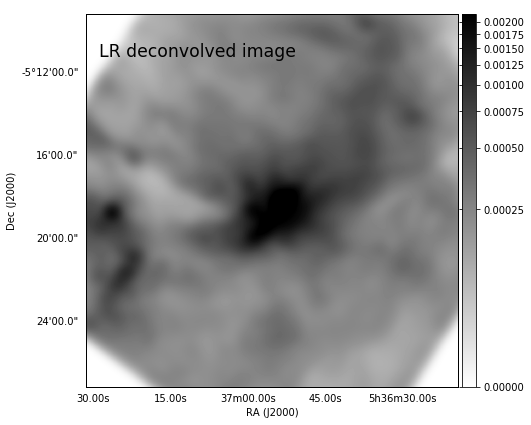

In [63]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/lr_deconv.fits'

fits.writeto(outpath,lucy5,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/lr_deconv.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'LR deconvolved image', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Combining SCUBA2 image with Planck images

In [32]:
from uvcombine import feather_kernel, fftmerge
#import simulated SCUBA2 map
sc2_file='/Users/shjiao/desktop/Ophiuchus/nov_try/blank850_fake.regrid.fits'
hdu_sc2=fits.open(sc2_file)
data_sc2 = hdu_sc2[0].data*0.9
data_sc2 = np.nan_to_num(data_sc2)
header = hdu_sc2[0].header

pixscale = 0.6
lowresfwhm = 300.
nax2,nax1 = data_sc2.shape
kfft, ikfft = feather_kernel(nax2, nax1, lowresfwhm, pixscale,)

im_hi = data_sc2

# combine with Planck image
im_low = smoothed_data_gauss_low
lowresscalefactor=1
replace_hires=False
highpassfilterSD = False
deconvSD = False
highresscalefactor=1

fftsum, combo = fftmerge(kfft, ikfft, im_hi*highresscalefactor,
                         im_low*lowresscalefactor,
                         replace_hires=replace_hires,
                         highpassfilterSD=highpassfilterSD,
                         deconvSD=deconvSD)


INFO: Auto-setting vmin to -4.953e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.821e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.212e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.519e-03 [aplpy.core]


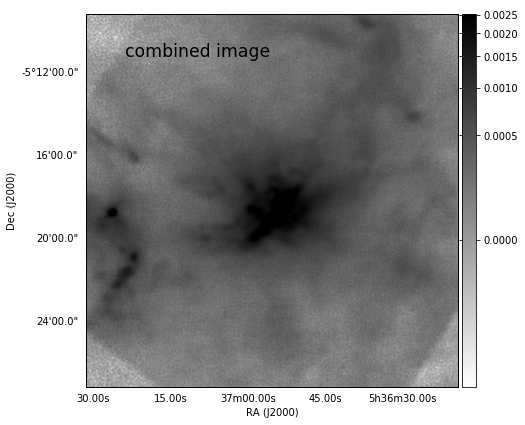

In [64]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/combined_ori.fits'

fits.writeto(outpath,combo.real,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/combined_ori.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'combined image', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

In [44]:
# combine with dirct deconvolved Planck image
im_low_dir = naive_deconv 
lowresfwhm = 289.2
nax2,nax1 = data_sc2.shape
kfft1, ikfft1 = feather_kernel(nax2, nax1, lowresfwhm, pixscale,)
fftsum1, combo1 = fftmerge(kfft1, ikfft1, im_hi*highresscalefactor,
                         naive_deconv*lowresscalefactor,
                         replace_hires=replace_hires,
                         highpassfilterSD=highpassfilterSD,
                         deconvSD=False)                                                           

INFO: Auto-setting vmin to -6.494e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.497e-03 [aplpy.core]
INFO: Auto-setting vmin to -3.067e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.120e-03 [aplpy.core]


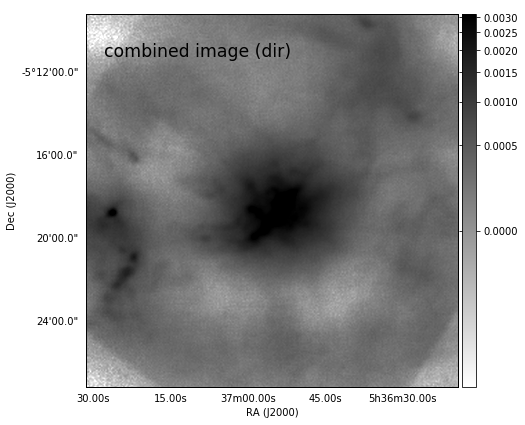

In [65]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/combined_dir.fits'

fits.writeto(outpath,combo1.real,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/combined_dir.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'combined image (dir)', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

In [93]:
# combine with L-R deconvolved Planck image

#assume the deconvolved image has resolution of'' 
lowresfwhm = 300.
nax2,nax1 = data_sc2.shape
kfft2, ikfft2 = feather_kernel(nax2, nax1, lowresfwhm, pixscale,)

im_low_lr = lucy5
lowresscalefactor=0.65
replace_hires=False
highpassfilterSD = False
deconvSD = False
highresscalefactor=0.85
fftsum2, combo2 = fftmerge(kfft2, ikfft2, im_hi*highresscalefactor,
                         im_low_lr*lowresscalefactor,
                         replace_hires=replace_hires,
                         highpassfilterSD=highpassfilterSD,
                         deconvSD=deconvSD)

INFO: Auto-setting vmin to -5.249e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.153e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.209e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.819e-03 [aplpy.core]


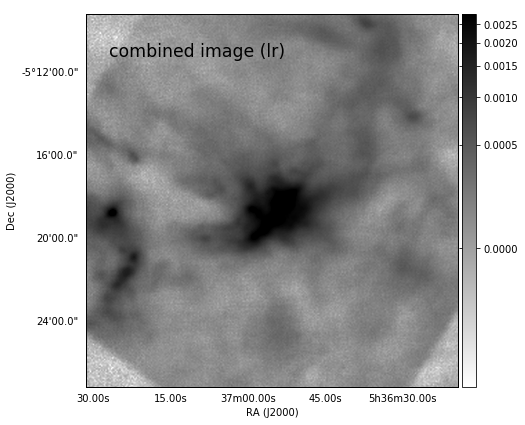

In [94]:
outpath = r'/Users/shjiao/desktop/Ophiuchus/nov_try/combined_lr.fits'

fits.writeto(outpath,combo2.real,header=header) 

f_mod = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/nov_try/combined_lr.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_mod.add_label(0.3,0.9, 'combined image (lr)', color='black', relative=True, size='xx-large',layer='source')
f_mod.show_grayscale()
f_mod.add_colorbar()
f_mod.colorbar.show()
f_mod.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_mod.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

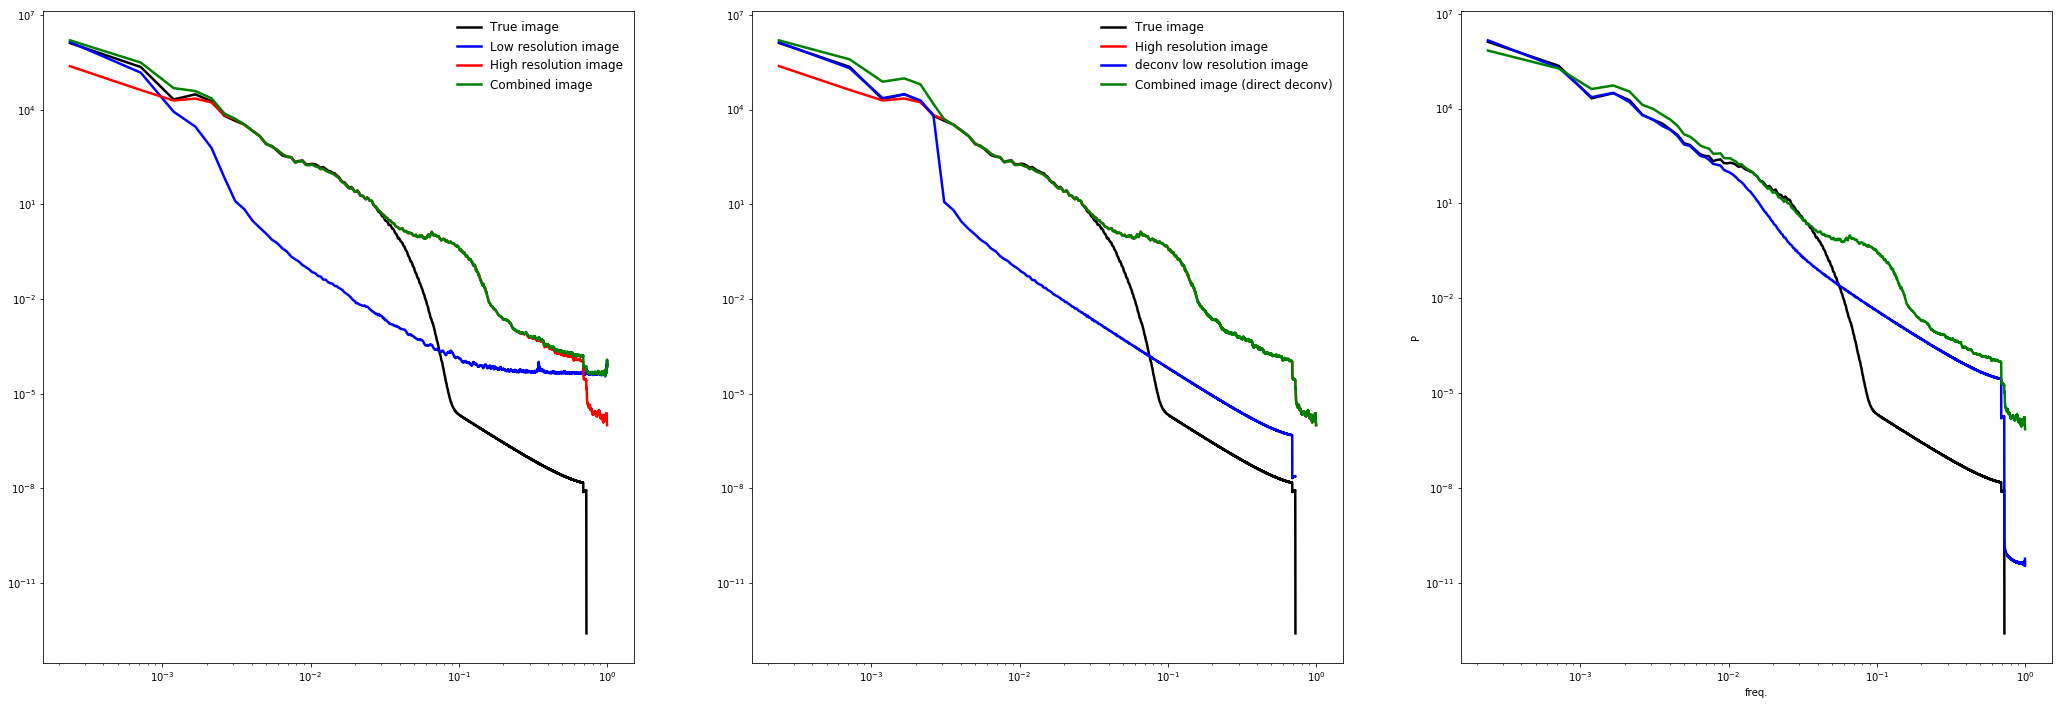

In [95]:
#import model map
Model_file='/Users/shjiao/desktop/Ophiuchus/nov_try/spire250.sm.scale.fits'
hdu_mod=fits.open(Model_file)
data_mod = hdu_mod[0].data
data_mod = np.nan_to_num(data_mod)
header = hdu_mod[0].header

#psd plotting, use the version from Adam
plt.clf()
fig1 = plt.figure(figsize=(1.8*5 * 4, 2.4*5 *1))
axis1 = plt.subplot(1,3,1)
frequency,zz = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis1.plot((frequency),(zz),linewidth=2.5,color='black',label='True image')
frequency1,zz1 = fft_tools.PSD2(smoothed_data_gauss_low,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis1.plot((frequency1),(zz1),linewidth=2.5,color='blue',label='Low resolution image')
frequency2,zz2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis1.plot((frequency2),(zz2),linewidth=2.5,color='red',label='High resolution image')
frequency3,zz3 = fft_tools.PSD2(combo.real,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis1.plot((frequency3),(zz3),linewidth=2.5,color='green',label='Combined image')
axis1.legend(frameon=False,fontsize=12)

axis2 = plt.subplot(1,3,2)
axis2.plot((frequency),(zz),linewidth=2.5,color='black',label='True image')
axis2.plot((frequency2),(zz2),linewidth=2.5,color='red',label='High resolution image')
frequency_,zz_ = fft_tools.PSD2(naive_deconv,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis2.plot((frequency_),(zz_),linewidth=2.5,color='blue',label='deconv low resolution image')
frequency4,zz4 = fft_tools.PSD2(combo1.real,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis2.plot((frequency4),(zz4),linewidth=2.5,color='green',label='Combined image (direct deconv)')
axis2.legend(frameon=False,fontsize=12)

axis3 = plt.subplot(1,3,3)
axis3.plot((frequency),(zz),linewidth=2.5,color='black',label='True image')

frequency5,zz5 = fft_tools.PSD2(lucy5,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis3.plot((frequency5),(zz5),linewidth=2.5,color='blue',label='5th LR deconv low resolution image')
frequency6,zz6 = fft_tools.PSD2(combo2.real,fft_pad=True,oned=True,view=False,wavnum_scale=False)
axis3.plot((frequency6),(zz6),linewidth=2.5,color='green',label='Combined image (LR deconv)')


axis1.set_xscale('log')
axis1.set_yscale('log')
axis2.set_xscale('log')
axis2.set_yscale('log')
axis3.set_xscale('log')
axis3.set_yscale('log')



#axis1.set_xlim((3*10**-3))
#axis1.set_ylim((10**-1))

#axis2.set_xlim((3*10**-3))
#axis2.set_ylim((10**-1))

#axis3.set_xlim((3*10**-3))
#axis3.set_ylim((10**-1))
axis3.set_xlabel('freq.')
axis3.set_ylabel('P')
plt.show()

I can't get a very good combination using Python code and I will keep trying....